### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/border-gavaskar-trophy-results/BGTresults.csv


### Dataset reading

In [2]:
df = pd.read_csv('/kaggle/input/border-gavaskar-trophy-results/BGTresults.csv')

In [3]:
df.head()

,Test Series Year,Test Number,Innings,Venue,Host,Highest Scorer,Team,Runs by highest scorer,best bowler,wickets by best bowler,team total,Winner,Win Margin,MOTM,Ind captain,Aus captain,MOTS,Series Win
0,1996-97,1,1,Delhi,India,Michael Slater,Australia,44,Anil Kumble,4.0,182/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
1,1996-97,1,2,Delhi,India,Nayan Mongia,India,152,Paul Reiffel,3.0,361/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
2,1996-97,1,3,Delhi,India,Steve Waugh,Australia,67,Anil Kumble,5.0,234/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
3,1996-97,1,4,Delhi,India,Mohd. Azharuddin,India,21,Paul Reiffel,2.0,56/3,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
4,1997-98,1,1,Chennai,India,Navjot Sidhu,India,62,Shane Warne,4.0,257/10,India,179r,Sachin Tendulkar,Mohd. Azharuddin,Mark Taylor,Sachin Tendulkar,India


In [4]:
df.tail()

,Test Series Year,Test Number,Innings,Venue,Host,Highest Scorer,Team,Runs by highest scorer,best bowler,wickets by best bowler,team total,Winner,Win Margin,MOTM,Ind captain,Aus captain,MOTS,Series Win
209,2022-23,3,3,Indore,India,Cheteshwar Pujara,India,59,Nathan Lyon,8.0,163/10,Australia,9w,Nathan Lyon,Rohit Sharma,Steve Smith,Ravichandran Ashwin-Ravindra Jadeja,India
210,2022-23,3,4,Indore,India,Travis Head,Australia,49,Ravichandran Ashwin,1.0,78/1,Australia,9w,Nathan Lyon,Rohit Sharma,Steve Smith,Ravichandran Ashwin-Ravindra Jadeja,India
211,2022-23,4,1,Ahmedabad,India,Usman Khawaja,Australia,180,Ravichandran Ashwin,6.0,480/10,Drawn,0,Virat Kohli,Rohit Sharma,Steve Smith,Ravichandran Ashwin-Ravindra Jadeja,India
212,2022-23,4,2,Ahmedabad,India,Virat Kohli,India,186,Nathan Lyon,3.0,571/9,Drawn,0,Virat Kohli,Rohit Sharma,Steve Smith,Ravichandran Ashwin-Ravindra Jadeja,India
213,2022-23,4,3,Ahmedabad,India,Travis Head,Australia,90,Axar Patel,1.0,175/2,Drawn,0,Virat Kohli,Rohit Sharma,Steve Smith,Ravichandran Ashwin-Ravindra Jadeja,India


In [5]:
df.sample(5)

,Test Series Year,Test Number,Innings,Venue,Host,Highest Scorer,Team,Runs by highest scorer,best bowler,wickets by best bowler,team total,Winner,Win Margin,MOTM,Ind captain,Aus captain,MOTS,Series Win
124,2012-13,1,2,Chennai,India,MS Dhoni,India,224,James Pattinson,5.0,572/10,India,8w,MS Dhoni,MS Dhoni,Michael Clarke,Ravichandran Ashwin,India
192,2020-21,3,1,Sydney,Australia,Steve Smith,Australia,131,Ravindra Jadeja,4.0,338/10,Drawn,0,Steve Smith,Ajinkya Rahane,Tim Paine,Pat Cummins,India
132,2012-13,3,3,Mohali,India,Phillip Hughes,Australia,69,Ravindra Jadeja,3.0,223/10,India,6w,Shikhar Dhawan,MS Dhoni,Michael Clarke,Ravichandran Ashwin,India
155,2016-17,1,2,Pune,India,KL Rahul,India,64,Steve O'Keefe,NaN,105/10,Australia,333r,Steve O'Keefe,Virat Kohli,Steve Smith,Ravindra Jadeja',India
95,2008-09,3,3,Delhi,India,VVS Laxman,India,59,Brett Lee,2.0,208/5,Drawn,0,VVS Laxman,Anil Kumble,Ricky Ponting,Ishant Sharma,India


In [6]:
df.columns

Index(['Test Series Year', 'Test Number', 'Innings', 'Venue', 'Host',
       'Highest Scorer', 'Team', 'Runs by highest scorer', 'best bowler',
       'wickets by best bowler', 'team total', 'Winner', 'Win Margin', 'MOTM',
       'Ind captain', 'Aus captain', 'MOTS', 'Series Win'],
      dtype='object')

In [7]:
df.shape

(214, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Test Series Year        214 non-null    object 
 1   Test Number             214 non-null    int64  
 2   Innings                 214 non-null    int64  
 3   Venue                   214 non-null    object 
 4   Host                    214 non-null    object 
 5   Highest Scorer          214 non-null    object 
 6   Team                    214 non-null    object 
 7   Runs by highest scorer  214 non-null    int64  
 8   best bowler             214 non-null    object 
 9   wickets by best bowler  213 non-null    float64
 10  team total              214 non-null    object 
 11  Winner                  214 non-null    object 
 12  Win Margin              214 non-null    object 
 13  MOTM                    214 non-null    object 
 14  Ind captain             214 non-null    ob

### Data Cleaning

In [9]:
df.isna().sum()

Test Series Year          0
Test Number               0
Innings                   0
Venue                     0
Host                      0
Highest Scorer            0
Team                      0
Runs by highest scorer    0
best bowler               0
wickets by best bowler    1
team total                0
Winner                    0
Win Margin                0
MOTM                      0
Ind captain               0
Aus captain               0
MOTS                      0
Series Win                0
dtype: int64

In [10]:
df[df['wickets by best bowler'].isna()]

,Test Series Year,Test Number,Innings,Venue,Host,Highest Scorer,Team,Runs by highest scorer,best bowler,wickets by best bowler,team total,Winner,Win Margin,MOTM,Ind captain,Aus captain,MOTS,Series Win
155,2016-17,1,2,Pune,India,KL Rahul,India,64,Steve O'Keefe,NaN,105/10,Australia,333r,Steve O'Keefe,Virat Kohli,Steve Smith,Ravindra Jadeja',India


In [11]:
wickets_mode = df['wickets by best bowler'].mode()[0]
df['wickets by best bowler'].fillna(wickets_mode, inplace=True)

In [12]:
df.isna().sum()

Test Series Year          0
Test Number               0
Innings                   0
Venue                     0
Host                      0
Highest Scorer            0
Team                      0
Runs by highest scorer    0
best bowler               0
wickets by best bowler    0
team total                0
Winner                    0
Win Margin                0
MOTM                      0
Ind captain               0
Aus captain               0
MOTS                      0
Series Win                0
dtype: int64

Treated missing values

In [13]:
df.duplicated().sum()

0

There is no duplicate value

#### Checking for outliers

In [14]:
df.describe()

,Test Number,Innings,Runs by highest scorer,wickets by best bowler
count,214.000000,214.000000,214.000000,214.000000
mean,2.336449,2.429907,94.429907,3.915888
std,1.095822,1.097262,56.356446,1.645146
min,1.000000,1.000000,4.000000,0.000000
25%,1.000000,1.000000,55.000000,3.000000
50%,2.000000,2.000000,78.500000,4.000000
75%,3.000000,3.000000,122.750000,5.000000
max,4.000000,4.000000,329.000000,8.000000


In [15]:
df[df['Runs by highest scorer']==4]

,Test Series Year,Test Number,Innings,Venue,Host,Highest Scorer,Team,Runs by highest scorer,best bowler,wickets by best bowler,team total,Winner,Win Margin,MOTM,Ind captain,Aus captain,MOTS,Series Win
183,2018-19,4,3,Sydney,Australia,Usman Khawaja,Australia,4,Jasprit Bumrah,0.0,6/0,Drawn,0,Cheteshwar Pujara,Virat Kohli,Tim Paine,Cheteshwar Pujara,India


In [16]:
df[df['wickets by best bowler']==0]

,Test Series Year,Test Number,Innings,Venue,Host,Highest Scorer,Team,Runs by highest scorer,best bowler,wickets by best bowler,team total,Winner,Win Margin,MOTM,Ind captain,Aus captain,MOTS,Series Win
29,2000-01,1,4,Mumbai,India,Matthew Hayden,Australia,28,Rahul Sanghvi,0.0,47/0,Australia,10w,Adam Gilchrist,Sourav Ganguly,Steve Waugh,Harbhajan Singh,India
61,2004-05,2,4,Chennai,India,Virendra Sehwag,India,12,Jason Gillespie,0.0,19/0,Drawn,0,Anil Kumble,Sourav Ganguly,Adam Gilchrist,Damien Martyn,Australia
96,2008-09,3,4,Delhi,India,Matthew Hayden,Australia,16,Amit Mishra,0.0,31/0,Drawn,0,VVS Laxman,Anil Kumble,Ricky Ponting,Ishant Sharma,India
183,2018-19,4,3,Sydney,Australia,Usman Khawaja,Australia,4,Jasprit Bumrah,0.0,6/0,Drawn,0,Cheteshwar Pujara,Virat Kohli,Tim Paine,Cheteshwar Pujara,India


If you know basic rules of Test cricket then you can say that these values are not outliers

##### Data is clean now so let's do analysis

### Analysis

#### Total Wins by each team

In [17]:
win = df.groupby(["Test Series Year","Test Number"])["Winner","Host"].first().reset_index()
win.head()

/tmp/ipykernel_773/4289440417.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  win = df.groupby(["Test Series Year","Test Number"])["Winner","Host"].first().reset_index()


,Test Series Year,Test Number,Winner,Host
0,1996-97,1,India,India
1,1997-98,1,India,India
2,1997-98,2,India,India
3,1997-98,3,Australia,India
4,1999-00,1,Australia,Australia


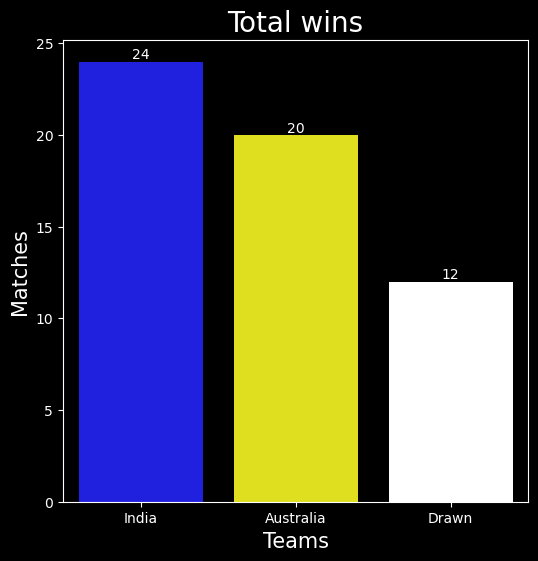

In [18]:
plt.figure(figsize = (6,6))
color = ['blue', 'yellow', 'white'] 
ax = sns.countplot(x = 'Winner',data=win, palette=color)
plt.xlabel("Teams", fontsize=15)
plt.ylabel("Matches", fontsize=15)
plt.title("Total wins", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

India has won more matches than Australia

### Total wins by each team in both countries

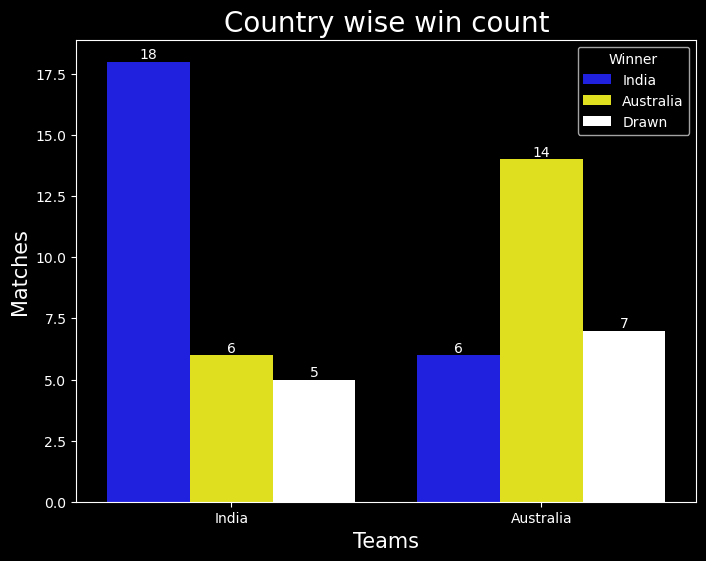

In [19]:
plt.figure(figsize = (8,6))
color = ['blue', 'yellow', 'white'] 
ax = sns.countplot(x = 'Host',data=win, hue='Winner' ,palette=color)
plt.xlabel("Teams", fontsize=15)
plt.ylabel("Matches", fontsize=15)
plt.title("Country wise win count", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

* Host team is dominating in most of the series as they have advantage of the condition
* But India has better record in their home condition

#### Won by each team at a particular match of a series

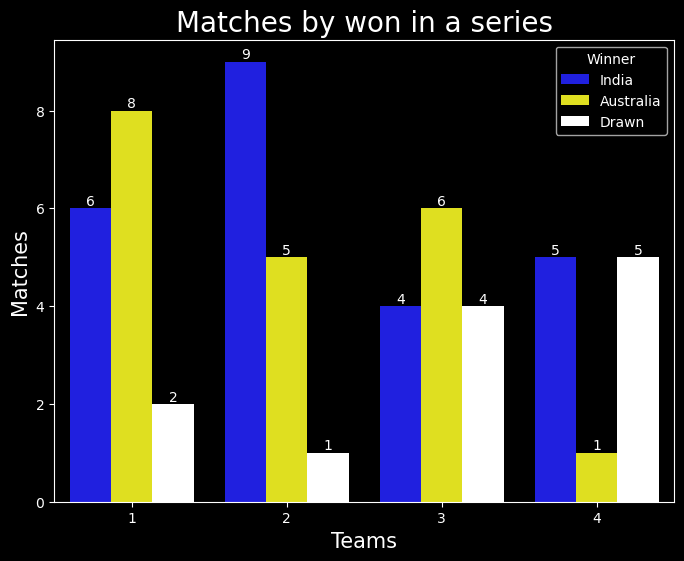

In [20]:
plt.figure(figsize = (8,6))
color = ['blue', 'yellow', 'white'] 
ax = sns.countplot(x = 'Test Number',data=win, hue='Winner' ,palette=color)
plt.xlabel("Teams", fontsize=15)
plt.ylabel("Matches", fontsize=15)
plt.title("Matches by won in a series", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

* Majority of odd matches won by Australia and even matches by India
* The chances of draw result has increased in last 2 matches of the series

#### Overall matches won by each team in a series

/tmp/ipykernel_773/2586673115.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(x="Winner",y="Test Series Year",data=win, palette=color)


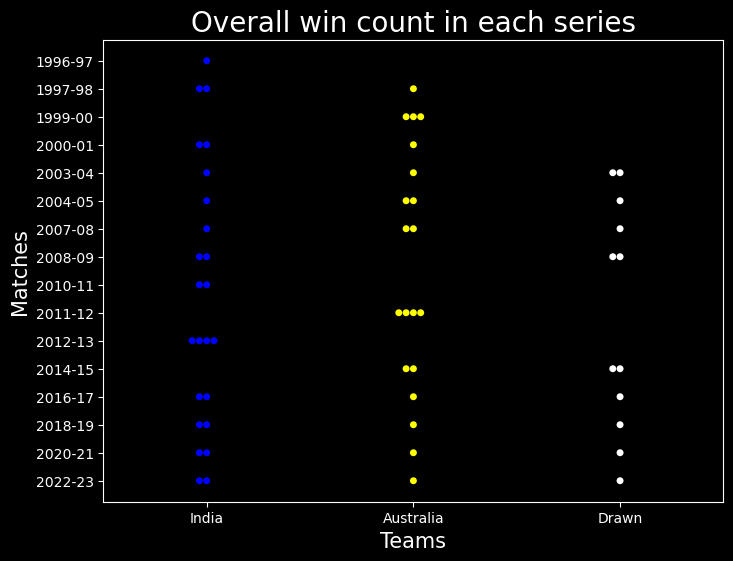

In [21]:
plt.figure(figsize = (8,6))
color = ['blue', 'yellow', 'white'] 
ax = sns.swarmplot(x="Winner",y="Test Series Year",data=win, palette=color)
plt.xlabel("Teams", fontsize=15)
plt.ylabel("Matches", fontsize=15)
plt.title("Overall win count in each series", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

* In 1999-2000, 2011-2012 Australia whitewashed India
* In 1996-1997, 2010-2011, 2012-2013 India whitewashed Australia
* India has won last 4 BGT series and result is same in all of them: IND->2, AUS->1, DRAW->1

#### Top bowlers so far in BGT

In [22]:
top_bowlers = df["best bowler"].value_counts().sort_values(ascending=False).head()
top_bowlers

Anil Kumble            18
Nathan Lyon            16
Ravichandran Ashwin    15
Harbhajan Singh        13
Ravindra Jadeja        12
Name: best bowler, dtype: int64

/tmp/ipykernel_773/1039295987.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab10")


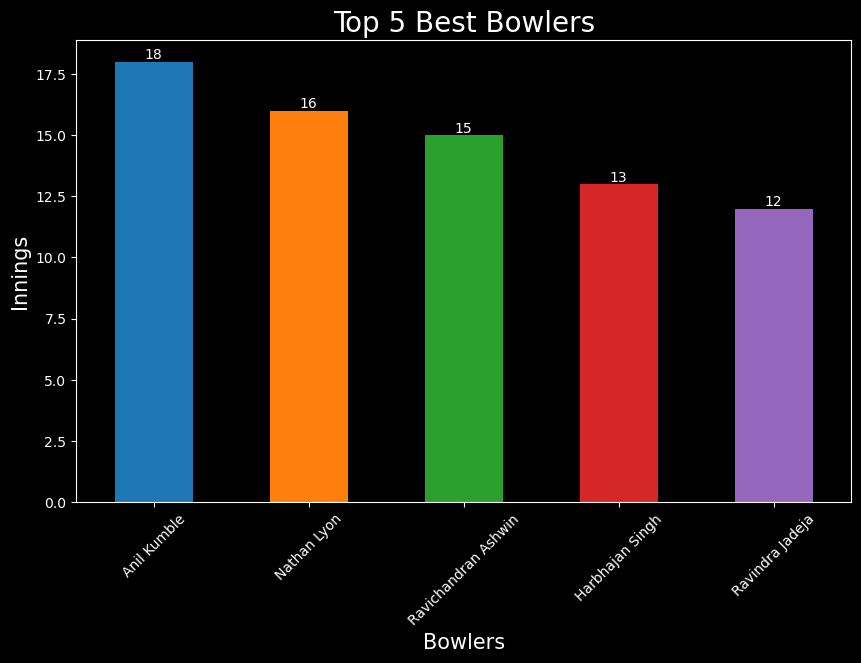

In [23]:
plt.figure(figsize=(10, 6))
cmap = plt.cm.get_cmap("tab10") 
ax = top_bowlers.plot(kind="bar", rot=45, color=cmap.colors)
plt.xlabel("Bowlers", fontsize=15)
plt.ylabel("Innings", fontsize=15)
plt.title("Top 5 Best Bowlers", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

It is very interesting that all Top 5 are spinners and among the top 5 spinners 4 are Indians.

#### Top batters so far in BGT

In [24]:
top_batters = df["Highest Scorer"].value_counts().sort_values(ascending=False).head()
top_batters

Sachin Tendulkar     19
Virat Kohli          12
Steve Smith          12
Cheteshwar Pujara    11
Matthew Hayden       10
Name: Highest Scorer, dtype: int64

/tmp/ipykernel_773/4222607588.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20")


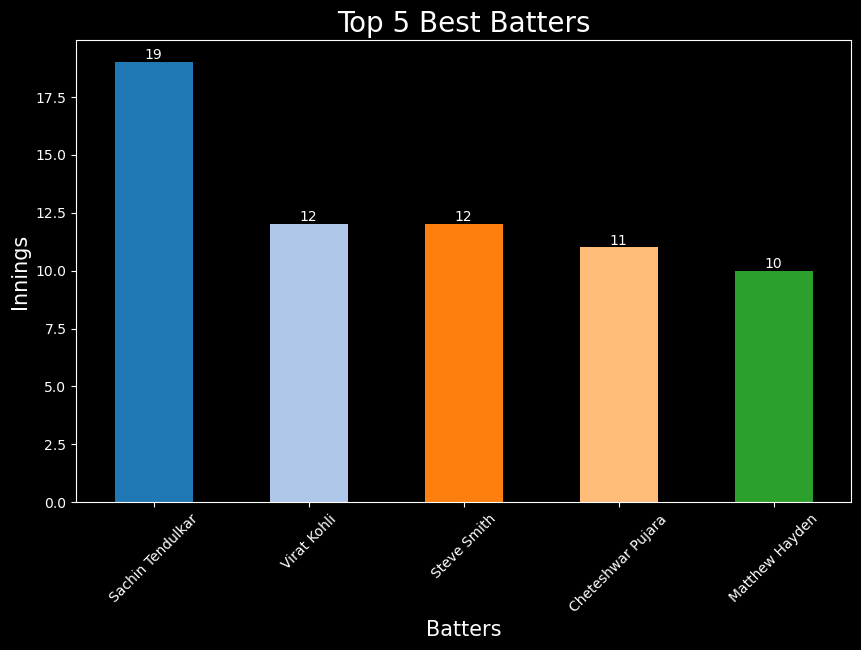

In [25]:
plt.figure(figsize=(10, 6))
cmap = plt.cm.get_cmap("tab20") 
ax = top_batters.plot(kind="bar", rot=45, color=cmap.colors)
plt.xlabel("Batters", fontsize=15)
plt.ylabel("Innings", fontsize=15)
plt.title("Top 5 Best Batters", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

Out of top 5 batters 3 batters are Indian

### Man Of The Match award

In [26]:
motm = df["MOTM"].value_counts().sort_values(ascending=False).head()
motm

Sachin Tendulkar     19
Ravindra Jadeja      15
Cheteshwar Pujara    13
Nathan Lyon          12
Steve Smith          12
Name: MOTM, dtype: int64

/tmp/ipykernel_773/1369300168.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Dark2")


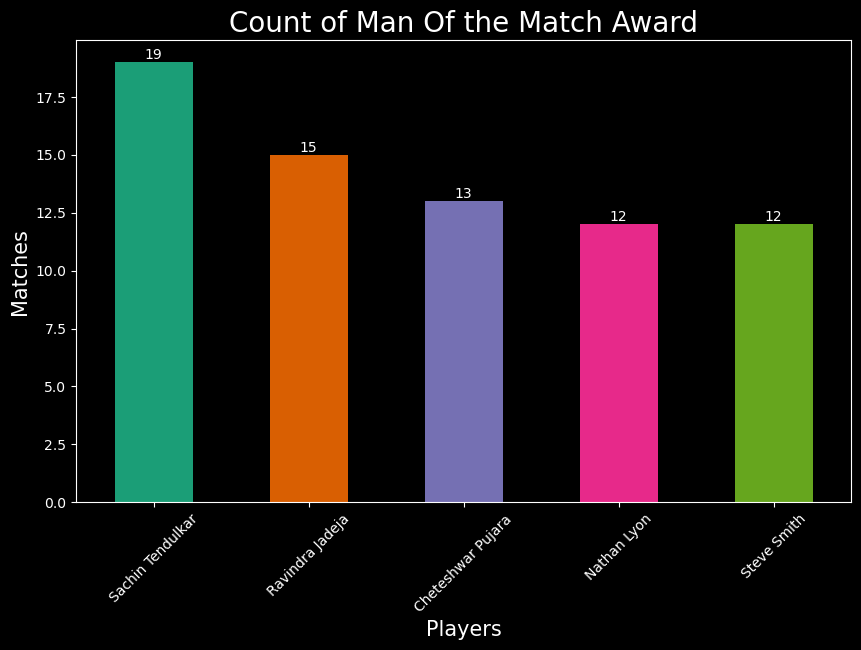

In [27]:
plt.figure(figsize=(10, 6))
cmap = plt.cm.get_cmap("Dark2") 
ax = motm.plot(kind="bar", rot=45, color=cmap.colors)
plt.xlabel("Players", fontsize=15)
plt.ylabel("Matches", fontsize=15)
plt.title("Count of Man Of the Match Award", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

* Indian cricketers are dominating here also
* Sachin Tendulkar has received Man Of The Match award highest 19 times in BGT

### Man Of The Series award

In [28]:
mots = df["MOTS"].value_counts().sort_values(ascending=False).head()
mots

Sachin Tendulkar    30
Rahul Dravid        16
Damien Martyn       16
Ishant Sharma       16
Steve Smith         16
Name: MOTS, dtype: int64

/tmp/ipykernel_773/2221440396.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Paired")


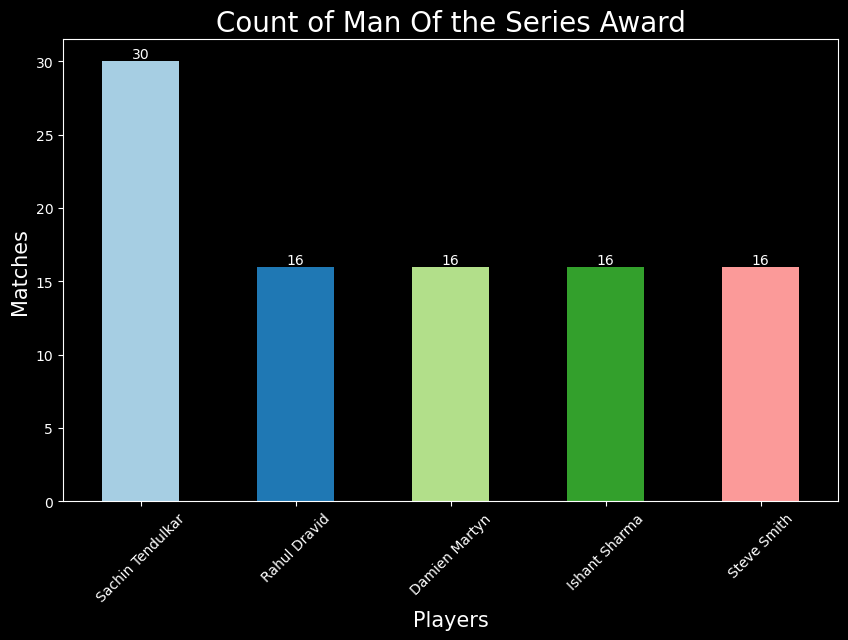

In [29]:
plt.figure(figsize=(10, 6))
cmap = plt.cm.get_cmap("Paired") 
ax = mots.plot(kind="bar", rot=45, color=cmap.colors)
plt.xlabel("Players", fontsize=15)
plt.ylabel("Matches", fontsize=15)
plt.title("Count of Man Of the Series Award", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

Sachin Tendular has received Man Of The Series award for 30 times and this is almost double than second highest Man Of The Series received by Rahul Dravid which is 16

#### Matches won by Indian Captains

In [30]:
cap = df.groupby(["Test Series Year","Test Number"])["Winner","Ind captain","Aus captain"].first().reset_index()
cap.head()

/tmp/ipykernel_773/1362698550.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cap = df.groupby(["Test Series Year","Test Number"])["Winner","Ind captain","Aus captain"].first().reset_index()


,Test Series Year,Test Number,Winner,Ind captain,Aus captain
0,1996-97,1,India,Sachin Tendulkar,Mark Taylor
1,1997-98,1,India,Mohd. Azharuddin,Mark Taylor
2,1997-98,2,India,Mohd. Azharuddin,Mark Taylor
3,1997-98,3,Australia,Mohd. Azharuddin,Mark Taylor
4,1999-00,1,Australia,Sachin Tendulkar,Steve Waugh


In [31]:
ind_cap_win = cap[cap["Winner"]=="India"]["Ind captain"].value_counts().sort_values(ascending=False)
ind_cap_win

MS Dhoni            8
Sourav Ganguly      3
Virat Kohli         3
Ajinkya Rahane      3
Mohd. Azharuddin    2
Rohit Sharma        2
Sachin Tendulkar    1
Rahul Dravid        1
Anil Kumble         1
Name: Ind captain, dtype: int64

/tmp/ipykernel_773/4083628428.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Accent")


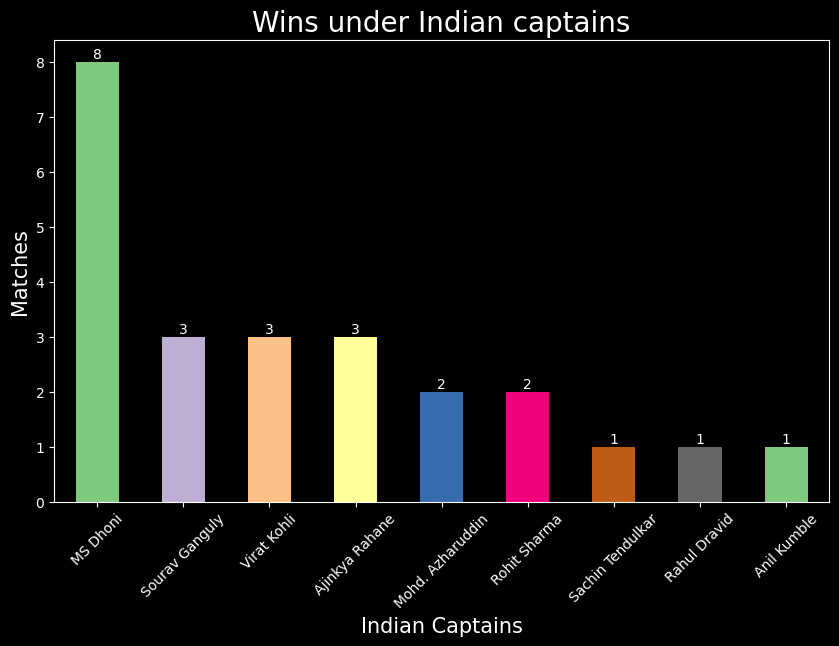

In [32]:
plt.figure(figsize=(10, 6))
cmap = plt.cm.get_cmap("Accent") 
ax = ind_cap_win.plot(kind="bar", rot=45, color=cmap.colors)
plt.xlabel("Indian Captains", fontsize=15)
plt.ylabel("Matches", fontsize=15)
plt.title("Wins under Indian captains", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

MS Dhoni is the most successful captain for India in BGT

#### Matches won by Australian Captains

In [33]:
aus_cap_win = cap[cap["Winner"]=="Australia"]["Aus captain"].value_counts().sort_values(ascending=False)
aus_cap_win

Steve Waugh       5
Michael Clarke    5
Steve Smith       3
Adam Gilchrist    2
Ricky Ponting     2
Tim Paine         2
Mark Taylor       1
Name: Aus captain, dtype: int64

/tmp/ipykernel_773/2555438472.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Set3")


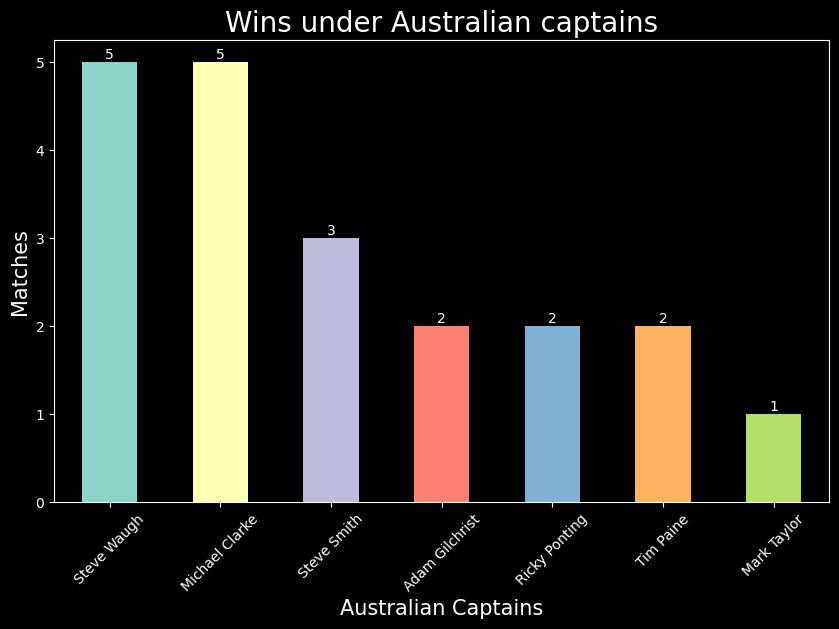

In [34]:
plt.figure(figsize=(10, 6))
cmap = plt.cm.get_cmap("Set3") 
ax = aus_cap_win.plot(kind="bar", rot=45, color=cmap.colors)
plt.xlabel("Australian Captains", fontsize=15)
plt.ylabel("Matches", fontsize=15)
plt.title("Wins under Australian captains", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

Steve Waugh and Michael Clarke are the most successful captain for Australia in BGT

#### Total runs scored by each time so far

In [35]:
Runs=[]
Wics=[]
run_wic=df['team total'].str.split("/").tolist()
for runs,wics in run_wic:
    Runs.append(runs)
    Wics.append(wics)

In [36]:
df["RUNS"]=Runs
df["WICKETS"]=Wics
df.drop("team total",axis=1)
df["RUNS"]=df["RUNS"].astype('int32')
df["WICKETS"]=df["WICKETS"].astype('int32')
df.head()

,Test Series Year,Test Number,Innings,Venue,Host,Highest Scorer,Team,Runs by highest scorer,best bowler,wickets by best bowler,team total,Winner,Win Margin,MOTM,Ind captain,Aus captain,MOTS,Series Win,RUNS,WICKETS
0,1996-97,1,1,Delhi,India,Michael Slater,Australia,44,Anil Kumble,4.0,182/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India,182,10
1,1996-97,1,2,Delhi,India,Nayan Mongia,India,152,Paul Reiffel,3.0,361/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India,361,10
2,1996-97,1,3,Delhi,India,Steve Waugh,Australia,67,Anil Kumble,5.0,234/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India,234,10
3,1996-97,1,4,Delhi,India,Mohd. Azharuddin,India,21,Paul Reiffel,2.0,56/3,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India,56,3
4,1997-98,1,1,Chennai,India,Navjot Sidhu,India,62,Shane Warne,4.0,257/10,India,179r,Sachin Tendulkar,Mohd. Azharuddin,Mark Taylor,Sachin Tendulkar,India,257,10


In [37]:
runs = df.groupby("Team")["RUNS"].sum()
runs

Team
Australia    31870
India        30737
Name: RUNS, dtype: int32

In [38]:
run_df=pd.DataFrame(runs).reset_index()
run_df

,Team,RUNS
0,Australia,31870
1,India,30737


<Figure size 1000x800 with 0 Axes>

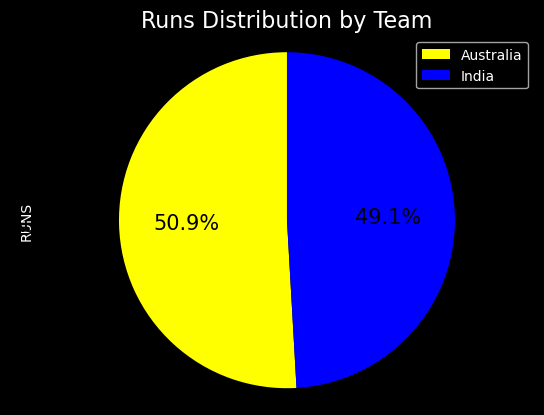

In [39]:
plt.figure(figsize=(10, 8))
colors=['yellow', 'blue']

ax = run_df.plot(kind='pie', labels=run_df['Team'], y='RUNS', colors=colors,
                 autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',textprops={'color': 'black','fontsize': 15}, startangle=90)

plt.title("Runs Distribution by Team", fontsize=16)
ax.axis('equal')
plt.show()

Both teams have scored almost equal runs so far

#### Total wickets taken by each time so far

In [40]:
wickets = df.groupby("Team")["WICKETS"].sum()
wickets

Team
Australia    927
India        905
Name: WICKETS, dtype: int32

In [41]:
wicket_df=pd.DataFrame(wickets).reset_index()
wicket_df

,Team,WICKETS
0,Australia,927
1,India,905


But Here the wickets are shown in the Australian row is taken by India and same for next row so lets interchange the teams

In [42]:
temp = wicket_df.iloc[0].copy()
wicket_df.iloc[0] = wicket_df.iloc[1]
wicket_df.iloc[1] = temp
wicket_df

,Team,WICKETS
0,India,905
1,Australia,927


<Figure size 1000x800 with 0 Axes>

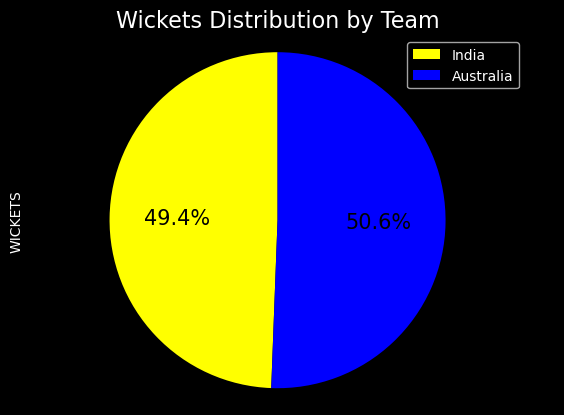

In [43]:
plt.figure(figsize=(10, 8))
colors=['yellow', 'blue']

ax = wicket_df.plot(kind='pie', labels=wicket_df['Team'], y='WICKETS', colors=colors,
                 autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',textprops={'color': 'black','fontsize': 15}, startangle=90)

plt.title("Wickets Distribution by Team", fontsize=16)
ax.axis('equal')
plt.show()

Both teams have taken almost equal wickets so far

#### Runs in each inning of a Test match

In [44]:
inn_runs_df = pd.DataFrame(df.groupby("Innings")["RUNS"].sum()).reset_index()
inn_runs_df

,Innings,RUNS
0,1,20405
1,2,20884
2,3,13499
3,4,7819


/tmp/ipykernel_773/201841922.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab10")


<Figure size 800x800 with 0 Axes>

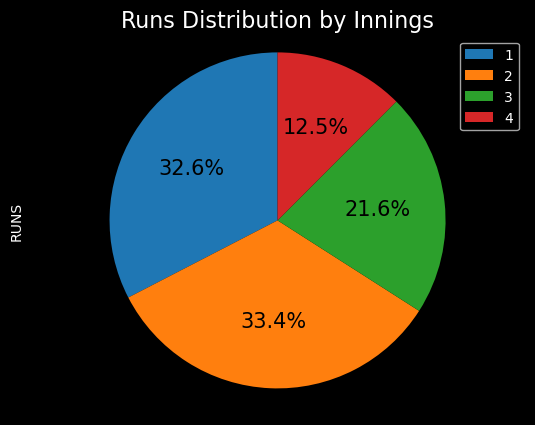

In [45]:
plt.figure(figsize=(8, 8))
cmap = plt.cm.get_cmap("tab10")
colors = cmap.colors
ax = inn_runs_df.plot(kind='pie', labels=inn_runs_df['Innings'], y='RUNS', colors=colors,
                 autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',textprops={'color': 'black','fontsize': 15}, startangle=90)

plt.title("Runs Distribution by Innings", fontsize=16)
ax.axis('equal')
plt.show()

* It says that most of the runs were scored in 1st innnings of both teams
* Pitch becomes harder in remaining 2 innings
* At last innings it becomes too tough for batting

### Insights
* India has won more matches than Australia
* Host team is dominating in most of the series as they have advantage of the condition
* But India has better record in their home condition
* Majority of odd matches won by Australia and even matches by India
* The chances of draw result has increased in last 2 matches of the series
* In 1999-2000, 2011-2012 Australia whitewashed India
* In 1996-1997, 2010-2011, 2012-2013 India whitewashed Australia
* India has won last 4 BGT series and result is same in all of them: IND->2, AUS->1, DRAW->1
* It is very interesting that all Top 5 are spinners and among the top 5 spinners 4 are Indians.
* Out of top 5 batters 3 batters are Indian
* Indian cricketers are dominating here also
* Sachin Tendulkar has received Man Of The Match award highest 19 times in BGT
* Sachin Tendular has received Man Of The Series award for 30 times and this is almost double than second highest Man Of The Series received by Rahul Dravid which is 16
* MS Dhoni is the most successful captain for India in BGT
* Steve Waugh and Michael Clarke are the most successful captain for Australia in BGT
* Both teams have scored almost equal runs so far
* Both teams have taken almost equal wickets so far
* It says that most of the runs were scored in 1st innnings of both teams
* Pitch becomes harder in remaining 2 innings
* At last innings it becomes too tough for batting